In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema

In [13]:
def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

(400, 400, 3)


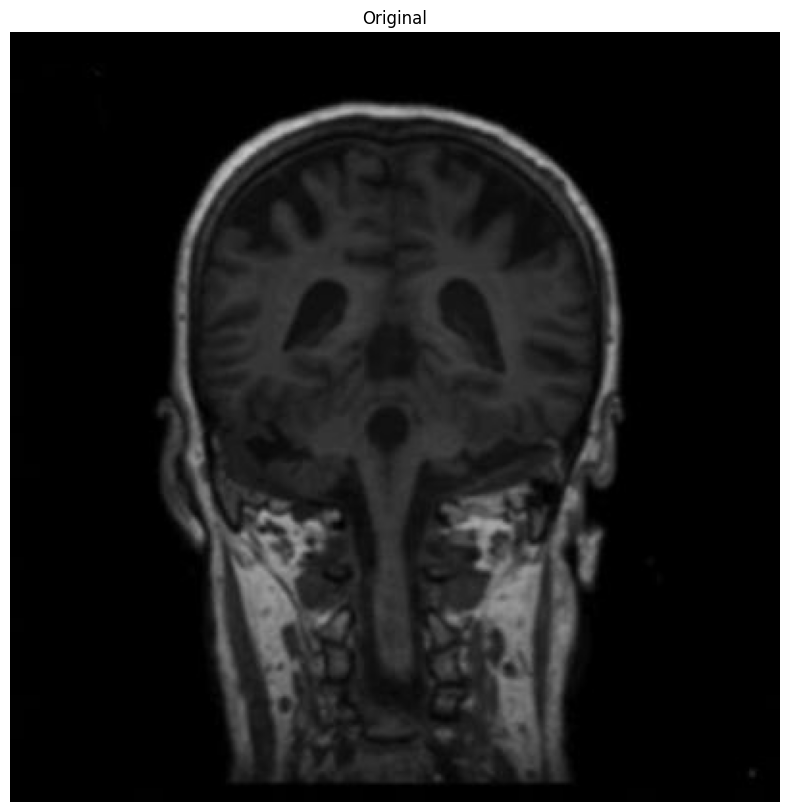

In [14]:
img = cv2.imread('./notumor_new/frontal_back/Tr-no_0209.jpg')
print(img.shape)
ShowImage('Original', img, 'bgr')

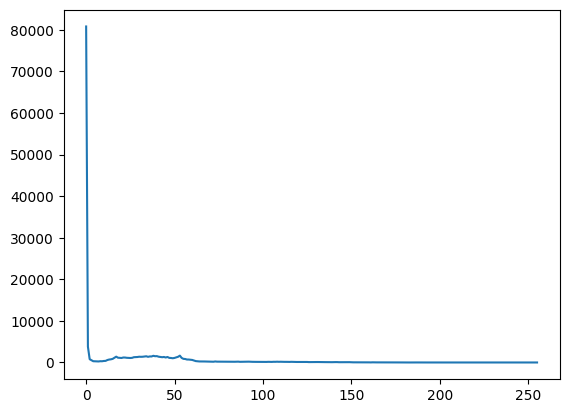

In [15]:
# find frequency of pixels in range 0-255 
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
# show the plotting graph of an image 
plt.plot(histr) 
plt.show()

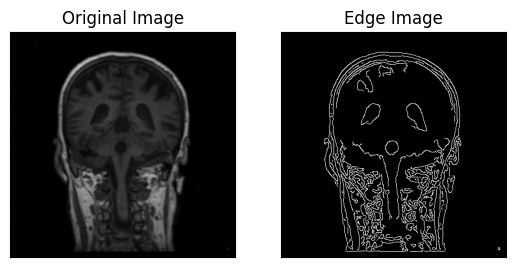

In [16]:
edges = cv2.Canny(img,30,90)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

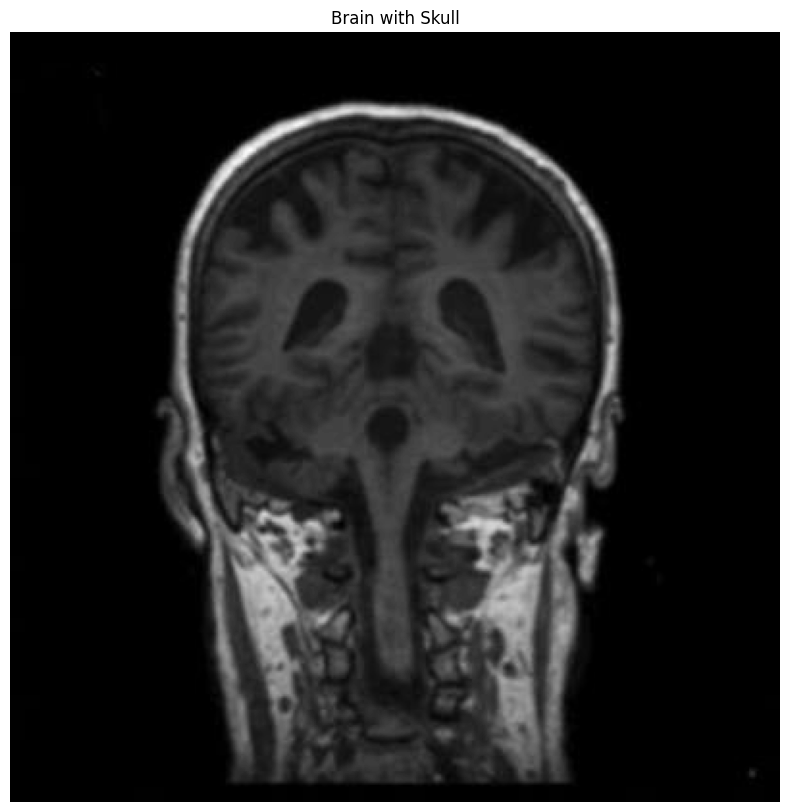

In [17]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain with Skull',gray,'gray')

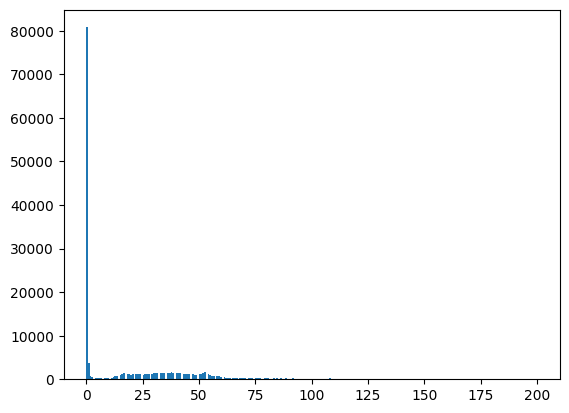

In [18]:
plt.hist(gray.ravel(),256)
plt.show()

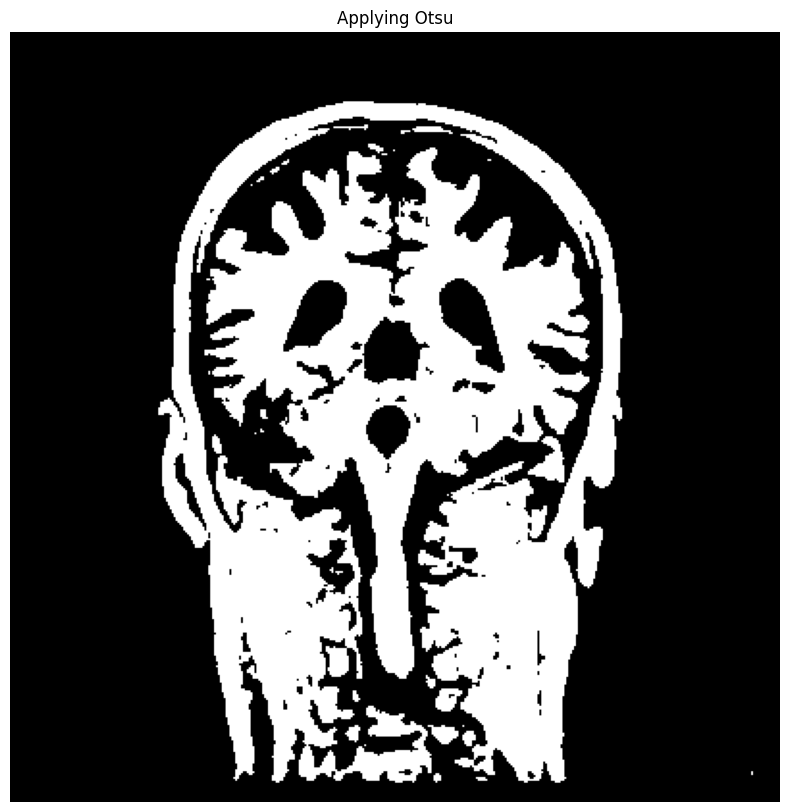

In [19]:
#Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Applying Otsu',thresh,'gray')

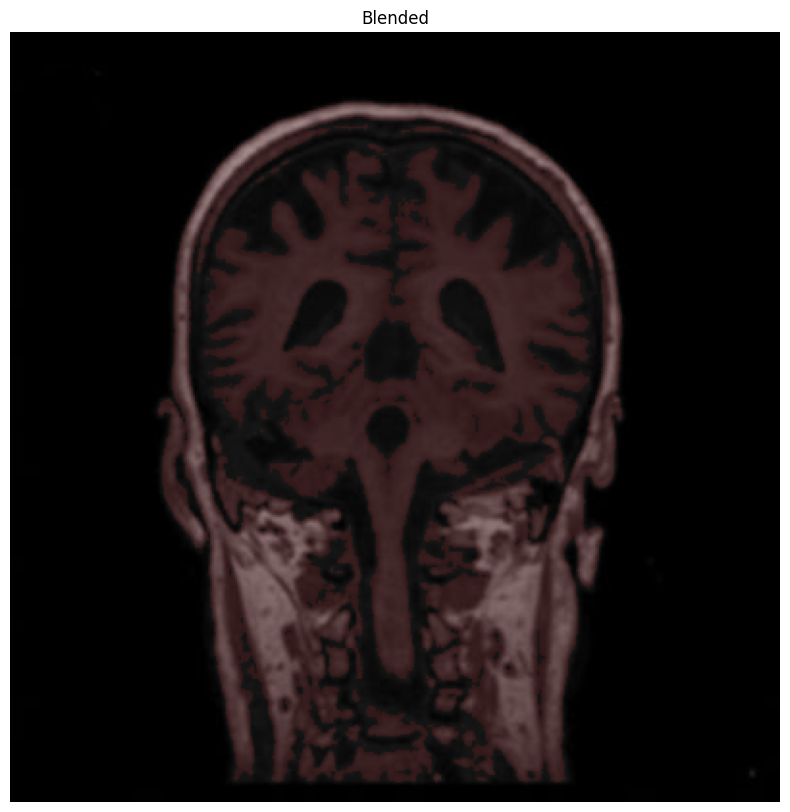

In [20]:
colormask = np.zeros(img.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255))
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
ShowImage('Blended', blended, 'bgr')

[113404, 25440, 22, 50, 7, 22, 1, 20353, 3, 7, 2, 11, 7, 1, 2, 2, 15, 3, 37, 1, 233, 1, 4, 5, 22, 116, 16, 44, 99, 1, 41, 1, 15, 2]
[113404, 25440, 22, 50, 7, 22, 1, 20353, 3, 7, 2, 11, 7, 1, 2, 2, 15, 3, 37, 1, 233, 1, 4, 5, 22, 116, 16, 44, 99, 1, 41, 1, 15, 2]


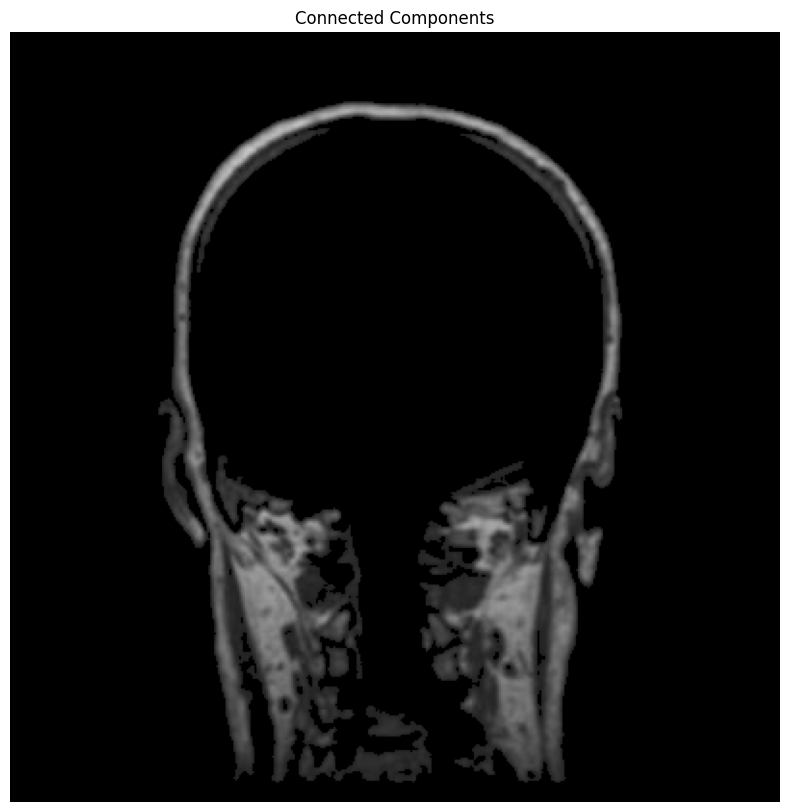

In [21]:
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
print([np.sum(markers==m) for m in range(np.max(markers))])
marker_area = [np.sum(markers==m) for m in range(np.max(markers))] 
#Get label of largest component by area
print(marker_area)
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)
ShowImage('Connected Components',brain_out,'rgb')

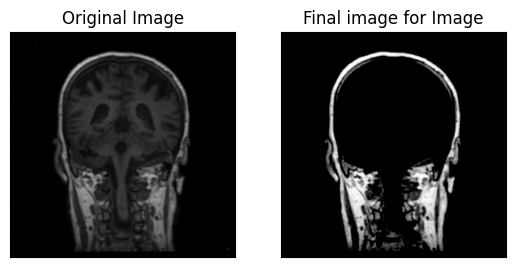

In [22]:
gray = cv2.cvtColor(brain_out, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(equalized_img,cmap = 'gray')
plt.title('Final image for Image'), plt.xticks([]), plt.yticks([])
plt.show()